## K-Nearest Neighbors & PCA plot 

In [ ]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

df = pd.read_csv("gene_data_PDWD_deID.csv", header=0, index_col = 0)
#df = df.iloc[:-4]
# df

data = np.log( df+1 )
data = data.T

data

Name,CALML3,PIK3R2,IL11RA,BAMBI,PLA2G10,ETV1,POLD4,NFKBIZ,SMAD2,IFNG,...,VPS33B,MRPS5,NUBP1,CNOT4,COG7,CC2D1B,GPATCH3,ZNF143,EDC3,TTC31
WD_0001,2.890372,6.643790,5.332719,5.010635,2.708050,3.295837,6.527958,6.837333,7.149917,1.945910,...,5.736572,6.563856,4.290459,6.214608,6.324359,3.828641,3.663562,4.736198,6.565265,5.758902
WD_0002,2.302585,6.643790,5.476464,5.351858,5.963579,3.871201,6.979145,6.442540,6.638568,2.639057,...,5.147494,5.998937,3.988984,5.746203,6.222576,3.806662,4.262680,4.521789,6.066108,5.365976
WD_0003,2.079442,6.626718,4.615121,4.882802,2.197225,6.003887,6.180017,5.117994,6.894670,2.197225,...,5.549076,6.562444,4.454347,6.089045,6.318968,3.610918,3.258097,4.727388,6.466145,5.220356
WD_0004,2.564949,6.994850,5.811141,4.143135,6.232448,4.369448,6.899723,6.947937,6.917706,2.397895,...,5.411646,6.551080,4.624973,6.295266,6.752270,4.174387,4.369448,5.036953,6.556778,5.808142
WD_0005,2.639057,6.131226,5.572154,5.976351,3.663562,4.682131,6.643790,6.152733,6.720220,2.484907,...,5.129899,6.751101,4.430817,6.368187,6.040255,3.610918,3.688879,4.753590,5.736572,5.902633
WD_0006,3.367296,6.865891,5.517453,6.016157,6.548219,3.806662,7.265430,6.688355,6.846943,2.639057,...,5.564520,6.533789,4.615121,6.175867,6.687109,4.043051,4.382027,5.068904,6.445720,5.733341
WD_0007,2.397895,6.313548,5.476464,5.924256,3.951244,4.962845,6.122493,4.564348,7.186901,2.079442,...,5.298317,6.431331,4.406719,6.393591,6.373320,3.367296,3.583519,5.003946,6.289716,5.828946
WD_0008,2.484907,5.828946,4.521789,3.526361,4.060443,2.484907,5.780744,5.634790,5.720312,1.791759,...,3.737670,4.532599,1.945910,4.025352,4.465908,3.091042,3.044522,3.178054,4.905275,4.189655
WD_0009,2.197225,6.575076,5.283204,5.129899,5.365976,4.094345,6.935370,6.642487,6.690842,1.791759,...,5.075174,6.008813,4.317488,5.894403,6.109248,3.713572,3.784190,4.634729,5.945421,5.451038
WD_0010,2.397895,6.478510,5.323010,4.290459,6.517671,3.496508,6.700731,6.603944,6.498282,2.079442,...,5.214936,6.335054,4.779123,6.242223,6.408529,4.060443,4.143135,4.997212,6.295266,5.564520


In [ ]:
y = [ 0 if d.split('_')[0] == 'WD' else 1 for d in data.index ]

In [ ]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
data.index

Index(['WD_0001', 'WD_0002', 'WD_0003', 'WD_0004', 'WD_0005', 'WD_0006',
       'WD_0007', 'WD_0008', 'WD_0009', 'WD_0010', 'WD_0011', 'WD_0012',
       'WD_0013', 'WD_0014', 'WD_0015', 'WD_0016', 'WD_0017', 'WD_0018',
       'WD_0019', 'WD_0020', 'WD_0021', 'PD_0001', 'PD_0002', 'PD_0003',
       'PD_0004', 'PD_0005', 'PD_0006', 'PD_0007', 'PD_0008', 'PD_0009',
       'PD_0010', 'PD_0011', 'PD_0012', 'PD_0013', 'PD_0014', 'PD_0015'],
      dtype='object')

In [ ]:
data.columns

Index(['CALML3', 'PIK3R2', 'IL11RA', 'BAMBI', 'PLA2G10', 'ETV1', 'POLD4',
       'NFKBIZ', 'SMAD2', 'IFNG',
       ...
       'VPS33B', 'MRPS5', 'NUBP1', 'CNOT4', 'COG7', 'CC2D1B', 'GPATCH3',
       'ZNF143', 'EDC3', 'TTC31'],
      dtype='object', name='Name', length=784)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=10)

In [ ]:
X_train

Name,CALML3,PIK3R2,IL11RA,BAMBI,PLA2G10,ETV1,POLD4,NFKBIZ,SMAD2,IFNG,...,VPS33B,MRPS5,NUBP1,CNOT4,COG7,CC2D1B,GPATCH3,ZNF143,EDC3,TTC31
WD_0014,1.945910,6.732211,5.347108,4.624973,5.627621,2.995732,6.930495,6.742881,6.992096,1.791759,...,5.402677,6.480045,4.553877,6.082219,6.306275,4.174387,4.219508,4.897840,6.304449,6.159095
WD_0019,4.060443,5.587249,5.036953,4.736198,2.397895,4.770685,5.710427,5.257495,6.333280,3.091042,...,4.418841,5.786897,3.258097,5.209486,5.541264,3.258097,2.833213,3.951244,5.153292,5.010635
WD_0015,2.708050,7.077498,4.644391,6.104793,4.543295,4.770685,6.555357,6.194405,7.170888,2.302585,...,5.370638,6.762730,4.663439,6.406880,6.876265,4.234107,3.931826,5.236442,6.406880,6.242223
WD_0002,2.302585,6.643790,5.476464,5.351858,5.963579,3.871201,6.979145,6.442540,6.638568,2.639057,...,5.147494,5.998937,3.988984,5.746203,6.222576,3.806662,4.262680,4.521789,6.066108,5.365976
PD_0003,3.367296,6.463029,3.496508,6.317165,5.720312,6.682109,8.017637,7.224753,6.859615,1.945910,...,5.743003,7.197435,4.564348,6.994850,6.313548,2.995732,4.110874,5.902633,7.118826,6.257668
WD_0021,2.833213,6.565265,5.624018,6.935370,1.791759,4.430817,6.836259,6.590301,6.388561,2.397895,...,5.564520,6.788972,4.962845,6.194405,6.705639,3.465736,3.583519,5.252273,6.651572,5.762051
PD_0002,2.944439,6.633318,5.252273,6.230481,2.397895,5.929589,6.350886,6.030685,6.949856,2.484907,...,5.755742,7.264030,4.867534,6.633318,6.447306,3.332205,3.931826,5.313206,6.712956,6.049733
WD_0007,2.397895,6.313548,5.476464,5.924256,3.951244,4.962845,6.122493,4.564348,7.186901,2.079442,...,5.298317,6.431331,4.406719,6.393591,6.373320,3.367296,3.583519,5.003946,6.289716,5.828946
WD_0012,2.302585,6.047372,4.700480,5.351858,5.849325,4.304065,6.987490,6.897705,6.464588,1.609438,...,4.941642,6.244167,4.382027,5.978886,6.198479,3.713572,3.663562,4.644391,5.958425,5.480639
PD_0014,4.158883,6.269096,4.605170,7.315884,1.791759,6.214608,6.668228,5.762051,6.953684,1.945910,...,5.389072,6.590301,4.605170,6.287859,6.135565,3.332205,3.555348,5.247024,6.343880,5.739793


In [ ]:
y_train

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0]

### Neighbor accuracy

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn4 = KNeighborsClassifier(n_neighbors=4)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn2 = KNeighborsClassifier(n_neighbors=2)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn5.fit(X_train, y_train)
knn4.fit(X_train, y_train)
knn3.fit(X_train, y_train)
knn2.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_4 = knn4.predict(X_test)
y_pred_3 = knn3.predict(X_test)
y_pred_2 = knn2.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=4", accuracy_score(y_test, y_pred_4)*100)
print("Accuracy with k=3", accuracy_score(y_test, y_pred_3)*100)
print("Accuracy with k=2", accuracy_score(y_test, y_pred_2)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 75.0
Accuracy with k=4 75.0
Accuracy with k=3 75.0
Accuracy with k=2 75.0
Accuracy with k=1 100.0


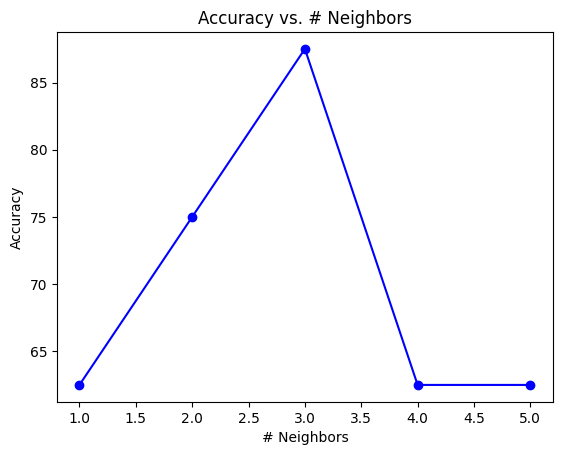

In [ ]:
import matplotlib.pyplot as plt

k_values = [5, 4, 3, 2, 1]
accuracy_values = [62.5, 62.5, 87.5, 75.0, 62.5]

plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')\

plt.xlabel('# Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. # Neighbors')

plt.show()

In [ ]:
X_test

Name,CALML3,PIK3R2,IL11RA,BAMBI,PLA2G10,ETV1,POLD4,NFKBIZ,SMAD2,IFNG,...,VPS33B,MRPS5,NUBP1,CNOT4,COG7,CC2D1B,GPATCH3,ZNF143,EDC3,TTC31
PD_0004,3.178054,6.171701,4.406719,6.486161,4.317488,5.187386,6.884487,6.418365,6.684612,3.583519,...,5.488938,6.761573,4.574711,5.902633,6.242223,2.890372,3.637586,4.962845,5.771441,5.886104
PD_0011,2.397895,6.641182,4.499810,2.944439,4.304065,3.465736,6.973543,8.178919,6.749931,2.397895,...,5.247024,6.499787,4.812184,6.180017,7.189922,3.044522,4.043051,5.411646,6.248043,5.831882
WD_0003,2.079442,6.626718,4.615121,4.882802,2.197225,6.003887,6.180017,5.117994,6.894670,2.197225,...,5.549076,6.562444,4.454347,6.089045,6.318968,3.610918,3.258097,4.727388,6.466145,5.220356
WD_0013,2.484907,5.669881,4.875197,6.469250,4.077537,6.857514,6.533789,6.419995,6.889591,3.044522,...,5.099866,6.459904,4.624973,6.095825,6.230481,3.496508,3.258097,5.023881,6.018593,5.549076
WD_0008,2.484907,5.828946,4.521789,3.526361,4.060443,2.484907,5.780744,5.634790,5.720312,1.791759,...,3.737670,4.532599,1.945910,4.025352,4.465908,3.091042,3.044522,3.178054,4.905275,4.189655
WD_0006,3.367296,6.865891,5.517453,6.016157,6.548219,3.806662,7.265430,6.688355,6.846943,2.639057,...,5.564520,6.533789,4.615121,6.175867,6.687109,4.043051,4.382027,5.068904,6.445720,5.733341
PD_0012,3.871201,4.976734,4.007333,2.397895,2.302585,3.332205,3.583519,3.496508,4.927254,2.639057,...,3.610918,5.420535,2.944439,4.219508,4.248495,2.484907,2.564949,4.007333,4.983607,4.143135
WD_0004,2.564949,6.994850,5.811141,4.143135,6.232448,4.369448,6.899723,6.947937,6.917706,2.397895,...,5.411646,6.551080,4.624973,6.295266,6.752270,4.174387,4.369448,5.036953,6.556778,5.808142


### Dimensionality Reduction (PCA)

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(X_test)
reduced_data_train = PCA(n_components=2).fit_transform(X_train)
reduced_data

array([[-11.9961207 ,  19.27604803],
       [-11.2151707 ,   5.34829886],
       [ -9.00352116,  -1.60867209],
       [-11.87428906,  -0.04701858],
       [ 35.4722825 ,  -9.93531866],
       [-10.72415086, -11.02222006],
       [ 29.71106193,  12.21389148],
       [-10.37009197, -14.22500898]])

In [ ]:
y_score = knn1.predict_proba(X_test)[:, 1]
y_score_train = knn1.predict_proba(X_train)[:, 1]
y_score

array([1., 1., 0., 0., 0., 0., 1., 0.])

In [ ]:
y_test

[1, 1, 0, 0, 0, 0, 1, 0]

In [ ]:
primary_sites = {
    "WD_0001":"Pancreas",
    "WD_0002":"ileum",
    "WD_0003":"Pancreas",
    "WD_0004":"ileum",
    "WD_0005":"Stomach",
    "WD_0006":"Small bowel",
    "WD_0007":"ileum",
    "WD_0008":"Small bowel",
    "WD_0009":"Small bowel",
    "WD_0010":"Colon",
    "WD_0011":"Lung",
    "WD_0012":"Small bowel",
    "WD_0013":"Lung",
    "WD_0014":"ileum",
    "WD_0015":"Pancreas",
    "WD_0016":"Rectum",
    "WD_0017":"ileum",
    "WD_0018":"ileum",
    "WD_0019":"Stomach",
    "WD_0020":"Pancreas",
    "WD_0021":"Unknown",
    "PD_0001":"Unknown",
    "PD_0002":"Pancreas",
    "PD_0003":"Rectum",
    "PD_0004":"Colon",
    "PD_0005":"Pancreas",
    "PD_0006":"Cecum",
    "PD_0007":"Breast",
    "PD_0008":"Small bowel",
    "PD_0009":"Unknown",
    "PD_0010":"Cecum",
    "PD_0011":"Breast",
    "PD_0012":"Esophagus",
    "PD_0013":"Cecum",
    "PD_0014":"Unknown",
    "PD_0015":"Unknown",
}
primaryColor = {
    "Pancreas": "gold",
    "ileum":"blue",
    "Unknown":"black",
    "Cecum":"green",
    "Esophagus":"brown",
    "Breast":"pink",
    "Small bowel":"darkred",
    "Colon":"purple",
    "Rectum":"orange",
    "Stomach":"DimGray",
    "Lung":"cyan",
}


In [ ]:
X_test.index

Index(['PD_0004', 'PD_0011', 'WD_0003', 'WD_0013', 'WD_0008', 'WD_0006',
       'PD_0012', 'WD_0004'],
      dtype='object')

In [ ]:
X_train.index

Index(['WD_0014', 'WD_0019', 'WD_0015', 'WD_0002', 'PD_0003', 'WD_0021',
       'PD_0002', 'WD_0007', 'WD_0012', 'PD_0014', 'PD_0001', 'PD_0010',
       'WD_0020', 'WD_0005', 'PD_0007', 'WD_0011', 'PD_0013', 'PD_0015',
       'WD_0009', 'PD_0006', 'WD_0018', 'WD_0017', 'PD_0009', 'PD_0005',
       'PD_0008', 'WD_0001', 'WD_0016', 'WD_0010'],
      dtype='object')

In [ ]:
reduced_data_train

array([[ 14.50226899, -11.87363713],
       [ 17.49767299,  10.0079518 ],
       [ -4.28834687, -10.64490219],
       [  7.95505167,  -7.82691556],
       [-21.41811869,  -0.27062733],
       [  4.09120015,  -8.10025261],
       [-27.21931308,   2.69600357],
       [  2.12899293,  -9.54323184],
       [  7.22691548,  -8.34047374],
       [-19.7968461 ,   2.15597754],
       [ 29.40588103,  35.97187829],
       [ -6.2373264 ,  16.00548219],
       [  6.95538109,   1.65458474],
       [ -1.49402067, -10.30756293],
       [-16.32956512,   1.1451378 ],
       [ 16.40353672,   0.34885333],
       [-14.52609328,   8.69716662],
       [-18.3707754 ,  10.09077964],
       [  4.14299062,  -7.38214908],
       [-11.84856094,   2.71415729],
       [ 13.66213283,   4.00545009],
       [  5.78715473, -17.55378196],
       [ -8.47809406,   6.8372657 ],
       [  4.79919335,   8.69250506],
       [ -6.83564032,   8.60894747],
       [  7.93286531,  -8.4948872 ],
       [  3.85498299,  -4.8379488 ],
 

In [ ]:
unknown = [[  4.09120015,  -8.10025262], [ 29.40588103,  35.97187827], [ -8.47809406,   6.83726564],[-19.7968461 ,   2.15597758],
       [-18.3707754 ,  10.09077918]]

unknownName = ['WD_0021', 'PD_0001', 'PD_0009','PD_0014','PD_0015']

unknownData = [0,1,1,1,1]

all_data_except_unknown = [[ 14.50226899, -11.87363717],
       [ 17.49767299,  10.00795177],
       [ -4.28834687, -10.64490234],
       [  7.95505168,  -7.82691555],
       [-21.41811869,  -0.27062736],
       [-27.21931308,   2.69600371],
       [  2.12899293,  -9.54323167],
       [  7.22691548,  -8.34047376],
 
      
       [ -6.23732641,  16.00548247],
       [  6.95538109,   1.6545847 ],
       [ -1.49402067, -10.30756286],
       [-16.32956513,   1.14513769],
       [ 16.40353672,   0.34885332],
       [-14.52609328,   8.69716682],

       [  4.14299062,  -7.38214899],
       [-11.84856094,   2.71415735],
       [ 13.66213283,   4.00545016],
       [  5.78715473, -17.55378199],
      
       [  4.79919335,   8.69250488],
       [ -6.83564032,   8.60894757],
       [  7.9328653 ,  -8.49488706],
       [  3.85498299,  -4.83794886],
       [ 10.49648004, -14.45577084]]

corresponding_sample_data = [0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0]
corresponding_sample = ['WD_0014', 'WD_0019', 'WD_0015', 'WD_0002',
       'PD_0003', 'PD_0002', 'WD_0007',
       'WD_0012', 'PD_0010',
       'WD_0020', 'WD_0005', 'PD_0007', 'WD_0011',
       'PD_0013', 'WD_0009', 'PD_0006',
       'WD_0018', 'WD_0017', 'PD_0005',
       'PD_0008', 'WD_0001', 'WD_0016', 'WD_0010', 
       'PD_0004', 'PD_0011', 'WD_0003', 'WD_0013',
       'WD_0008', 'WD_0006', 'PD_0012', 'WD_0004']


### PCA plot

In [ ]:
fig = go.Figure()

shape_mapping_test = {
    1: 'square', #hg
    0: 'circle'
}

shape_mapping_train = {
    1: 'square-open', #hg
    0: 'circle-open'
}

label = [f"{i}" for i, label in enumerate(unknownName)]
fig.add_trace(go.Scatter(
    x=[coord[0] for coord in unknown], y=[coord[1] for coord in unknown],
    text=label,
    mode='markers',
    marker_symbol=[shape_mapping_test[number] for number in unknownData],
    marker_color= [primaryColor[primary_sites[color]] for color in unknownName], marker_line_width=0, marker_line_color='black',
    showlegend=False
))

#TRAINNNNNNNNNNNNNNNNNNN
label_train = [f"TRAIN: {i}" for i, label in enumerate(corresponding_sample)]
fig.add_trace(go.Scatter(
    x=[coord[0] for coord in all_data_except_unknown], y=[coord[1] for coord in all_data_except_unknown],
    text=label_train,
    mode='markers',
    marker_symbol=[shape_mapping_train[number] for number in corresponding_sample_data],
    marker_color=[primaryColor[primary_sites[color]] for color in corresponding_sample], marker_line_width=2, marker_line_color='black',
    showlegend=False
))

fig.update_layout(
    autosize=False,
    width=850,
    height=600,
    xaxis=dict(scaleanchor="y", scaleratio=1),
    yaxis=dict(scaleanchor="x", scaleratio=1),
)

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker_symbol='square',
    marker_color='rgba(0, 0, 0, 0)', 
    marker_line_width=2,
    marker_line_color='black',
    showlegend=True,
    name='PD (Square)'
))
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker_symbol='circle',
    marker_color='rgba(0, 0, 0, 0)',  
    marker_line_width=2,
    marker_line_color='black',
    showlegend=True,
    name='WD (Circle)'
))
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker_symbol='square',
    marker_color='black', 
    marker_line_width=1,
    marker_line_color='black',
    showlegend=True,
    name='Test Set: Closed Shape (only black)'
))
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker_symbol='circle-open',
    marker_color='black',
    marker_line_width=2,
    marker_line_color='black',
    showlegend=True,
    name='Training Set: Open Shape (any color)'
))
for category, color in primaryColor.items():
    fig.add_trace(go.Scatter(
        x=[None],
        y=[None],
        mode='markers',
        marker_symbol='circle-open',
        marker_color=color,
        marker_line_width=2,
        marker_line_color='black',
        showlegend=True,
        name=category
    ))    


fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)


# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers', marker_size=12, )
fig.update_layout(title='KNN(K=1) Predicted',font=dict(size=20),legend=dict(font=dict(size=16)),
                  yaxis_zeroline=False, xaxis_zeroline=False, plot_bgcolor='white', paper_bgcolor='white',
                  )

fig.write_image("images/knn.pdf")

fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=479021a8-7c58-4ce8-a173-5b75b64309eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>